In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load data
data = pd.read_csv('../drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
# load random
data.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
42,50,M,NORMAL,NORMAL,15.790,drugY
127,35,M,NORMAL,NORMAL,7.845,drugX
61,24,M,HIGH,NORMAL,9.475,drugA
83,38,F,HIGH,NORMAL,11.326,drugA
63,45,M,LOW,NORMAL,8.370,drugX
75,26,M,LOW,NORMAL,20.909,drugY
36,32,M,HIGH,NORMAL,9.445,drugA
32,49,M,LOW,NORMAL,11.014,drugX
110,50,M,HIGH,HIGH,7.490,drugA
180,22,F,HIGH,NORMAL,22.818,drugY


In [5]:
# check features, its type and total observations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# check missing values
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Handling categorical values with Label Encoding

### Encode Sex column

In [8]:
data.Sex.unique() # or data['sex'].unique()

array(['F', 'M'], dtype=object)

In [10]:
# assign numeric values to labels
from sklearn import  preprocessing

le_sex = preprocessing.LabelEncoder()

le_sex.fit(['F', 'M'])

data.Sex = le_sex.transform(data.Sex) # transform sex column

In [11]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,drugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,drugY


### Encode BP column

In [12]:
data.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [13]:
le_BP = preprocessing.LabelEncoder()

le_BP.fit(data.BP.unique())
data.BP = le_BP.transform(data.BP)

In [14]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,HIGH,25.355,drugY
1,47,1,1,HIGH,13.093,drugC
2,47,1,1,HIGH,10.114,drugC
3,28,0,2,HIGH,7.798,drugX
4,61,0,1,HIGH,18.043,drugY


### Encode Choresterol column

In [16]:
# another simple way to do label encoding
# using pandas dataFrame map function
data.Cholesterol = data.Cholesterol.map({'NORMAL':0, 'HIGH':1})

In [17]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,1,25.355,drugY
1,47,1,1,1,13.093,drugC
2,47,1,1,1,10.114,drugC
3,28,0,2,1,7.798,drugX
4,61,0,1,1,18.043,drugY


In [20]:
data.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
55,26,0,1,1,14.160,drugC
187,47,1,0,1,10.403,drugA
195,56,0,1,1,11.567,drugC
62,67,1,1,0,20.693,drugY
142,60,1,0,0,8.621,drugB


In [27]:
# Separate independent and dependent variables
X = data.drop(['Drug'], axis = 1) # or axis = 'columns'
y = data['Drug'] # dependent

In [28]:
X # independent variables

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,1,25.355
1,47,1,1,1,13.093
2,47,1,1,1,10.114
3,28,0,2,1,7.798
4,61,0,1,1,18.043
...,...,...,...,...,...
195,56,0,1,1,11.567
196,16,1,1,1,12.006
197,52,1,2,1,9.894
198,23,1,2,0,14.020


In [29]:
y # dependents column

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

### Decision Tree

In [32]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [33]:
drug_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4)
#training
drug_classifier.fit(X_trainset, y_trainset)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [38]:
y_pred = drug_classifier.predict(X_testset)

In [39]:
X_testset

,Age,Sex,BP,Cholesterol,Na_to_K
40,73,0,2,1,19.221
51,67,1,2,0,10.898
139,69,0,2,1,10.065
197,52,1,2,1,9.894
170,28,0,2,1,12.879
82,32,0,1,1,9.712
183,36,0,0,0,15.490
46,37,0,0,1,13.091
70,70,1,0,1,13.967
100,31,1,0,0,11.871


In [40]:
y_pred

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

### Evaluate

In [42]:
from sklearn import metrics
import matplotlib.pyplot as plt
metrics.accuracy_score(y_testset, y_pred)

0.9833333333333333

[]

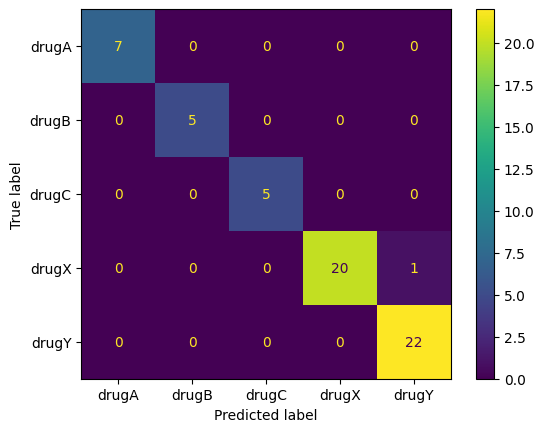

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_testset, y_pred , labels=drug_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=drug_classifier.classes_)
disp.plot()
plt.plot()


In [46]:
# Classification report
print(metrics.classification_report(y_testset, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



### Trying to predict with new values

In [49]:
drug_classifier.predict([[25, 0, 2, 1, 8.22]])

/home/pierre/.cache/pypoetry/virtualenvs/drug-classification-qyN8pZsX-py3.10/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['drugX'], dtype=object)